In [ ]:
# --------------------------------------------------------------
# Trabalho Final - Aprendizado Supervisionado
# Grupo 1: Gabriella Pinheiro .... 
# Regressão Linear: Aprimoramento de Modelo de Previsão de Preços de Imóveis na Califórnia
# --------------------------------------------------------------

In [155]:
# Importação das bibliotecas necessárias para o projeto

# Bibliotecas de manipulação e análise de dados
import numpy as np  # Biblioteca para operações matemáticas e com arrays
import pandas as pd  # Biblioteca para manipulação de dados em formato tabular (DataFrames)

# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca baseada no matplotlib com visualizações estatísticas mais avançadas

# Conjunto de dados da Califórnia (utilizado como base para o projeto)
from sklearn.datasets import fetch_california_housing  # Função para carregar o dataset de preços de imóveis na Califórnia

# Ferramentas para separar os dados em treino e teste
from sklearn.model_selection import train_test_split  # Função para dividir os dados entre treino e teste

# Modelo de regressão linear simples
from sklearn.linear_model import LinearRegression  # Classe que implementa o modelo de Regressão Linear

# Métricas de avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Métricas para avaliar o desempenho do modelo

# Configuração para ignorar avisos durante a execução
import warnings
warnings.filterwarnings('ignore')  # Ignora avisos que não afetam a execução do projeto

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')  # Define o estilo de fundo dos gráficos com grade branca (visual limpo e moderno)
sns.set_palette("deep")  # Define a paleta de cores padrão para os gráficos do seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Define o tamanho padrão das figuras (largura = 10, altura = 6)


In [156]:
# Carrega o conjunto de dados de preços de imóveis na Califórnia disponível no scikit-learn
california = fetch_california_housing()

# Cria um DataFrame pandas com as variáveis explicativas (features), nomeando as colunas conforme os nomes originais
X = pd.DataFrame(california.data, columns=california.feature_names)

# Cria uma Series pandas com a variável alvo (preço médio das casas), nomeando-a como 'MedHouseValue'
y = pd.Series(california.target, name='MedHouseValue')

# Concatena os dados de entrada (X) e a variável alvo (y) em um único DataFrame para facilitar a visualização e análise
df = pd.concat([X, y], axis=1)

# Exibe as primeiras linhas do DataFrame resultante
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [157]:
# =========================
# Exploração e Análise de Dados
# =========================

# Verifica o tamanho do dataset
print("Formato do DataFrame:", df.shape)

# Exibe informações gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
print("\nInformações do DataFrame:")
print(df.info())

# Estatísticas descritivas para todas as variáveis
print("\nEstatísticas descritivas:")
print(df.describe())

# Verifica valores ausentes em cada coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Formato do DataFrame: (20640, 9)

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      


Tipo de dado: float64
Valores ausentes: 0

Estatísticas descritivas da variável alvo:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseValue, dtype: float64


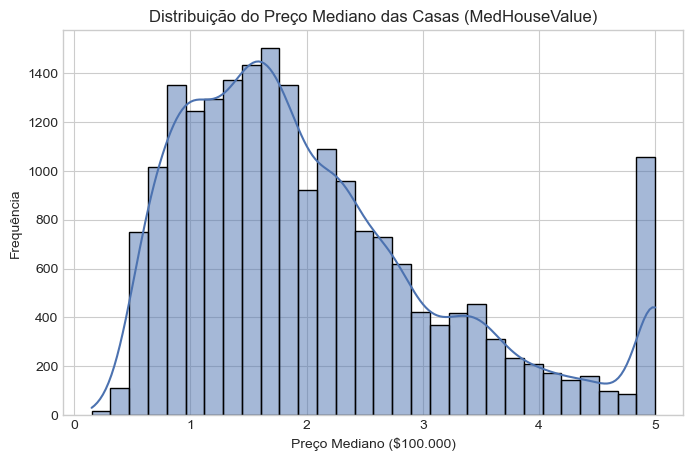

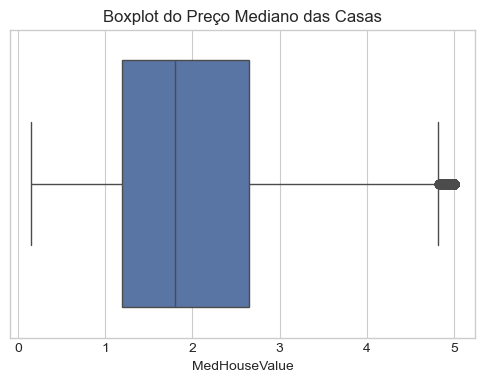

In [158]:
# =========================
# Etapa: Exploração da Variável Alvo (y - MedHouseValue)
# =========================

# Verifica o tipo de dado e se há valores ausentes
print("\nTipo de dado:", y.dtype)
print("Valores ausentes:", y.isnull().sum())

# Estatísticas descritivas da variável alvo
print("\nEstatísticas descritivas da variável alvo:")
print(y.describe())

# Histograma para visualizar a distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.title('Distribuição do Preço Mediano das Casas (MedHouseValue)')
plt.xlabel('Preço Mediano ($100.000)')
plt.ylabel('Frequência')
plt.show()

# Boxplot para identificar presença de outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=y)
plt.title('Boxplot do Preço Mediano das Casas')
plt.xlabel('MedHouseValue')
plt.show()


Limite inferior: -0.98
Limite superior: 4.82

Número de outliers detectados: 1071
Proporção de outliers no total: 5.19%


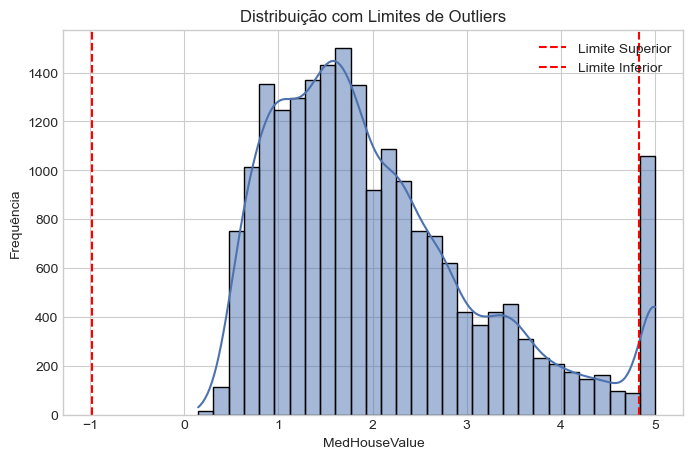

In [159]:
# =========================
# Análise de Outliers na Variável Alvo (MedHouseValue)
# =========================

# Calcula os quartis
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil

# Define os limites inferior e superior para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identifica valores que estão fora desses limites
outliers = y[(y < limite_inferior) | (y > limite_superior)]
print(f"\nNúmero de outliers detectados: {outliers.shape[0]}")
print(f"Proporção de outliers no total: {100 * outliers.shape[0] / y.shape[0]:.2f}%")

# Visualização com histograma para ver a cauda da distribuição
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.axvline(limite_superior, color='red', linestyle='--', label='Limite Superior')
plt.axvline(limite_inferior, color='red', linestyle='--', label='Limite Inferior')
plt.title('Distribuição com Limites de Outliers')
plt.xlabel('MedHouseValue')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [160]:
# Remoção de outlier

# df = df[(df['MedHouseValue'] >= lower_bound) & (df['MedHouseValue'] <= upper_bound)]
# print(f"Shape after removing outliers: {df.shape}")


Informações gerais das variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Valores ausentes por variável:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429

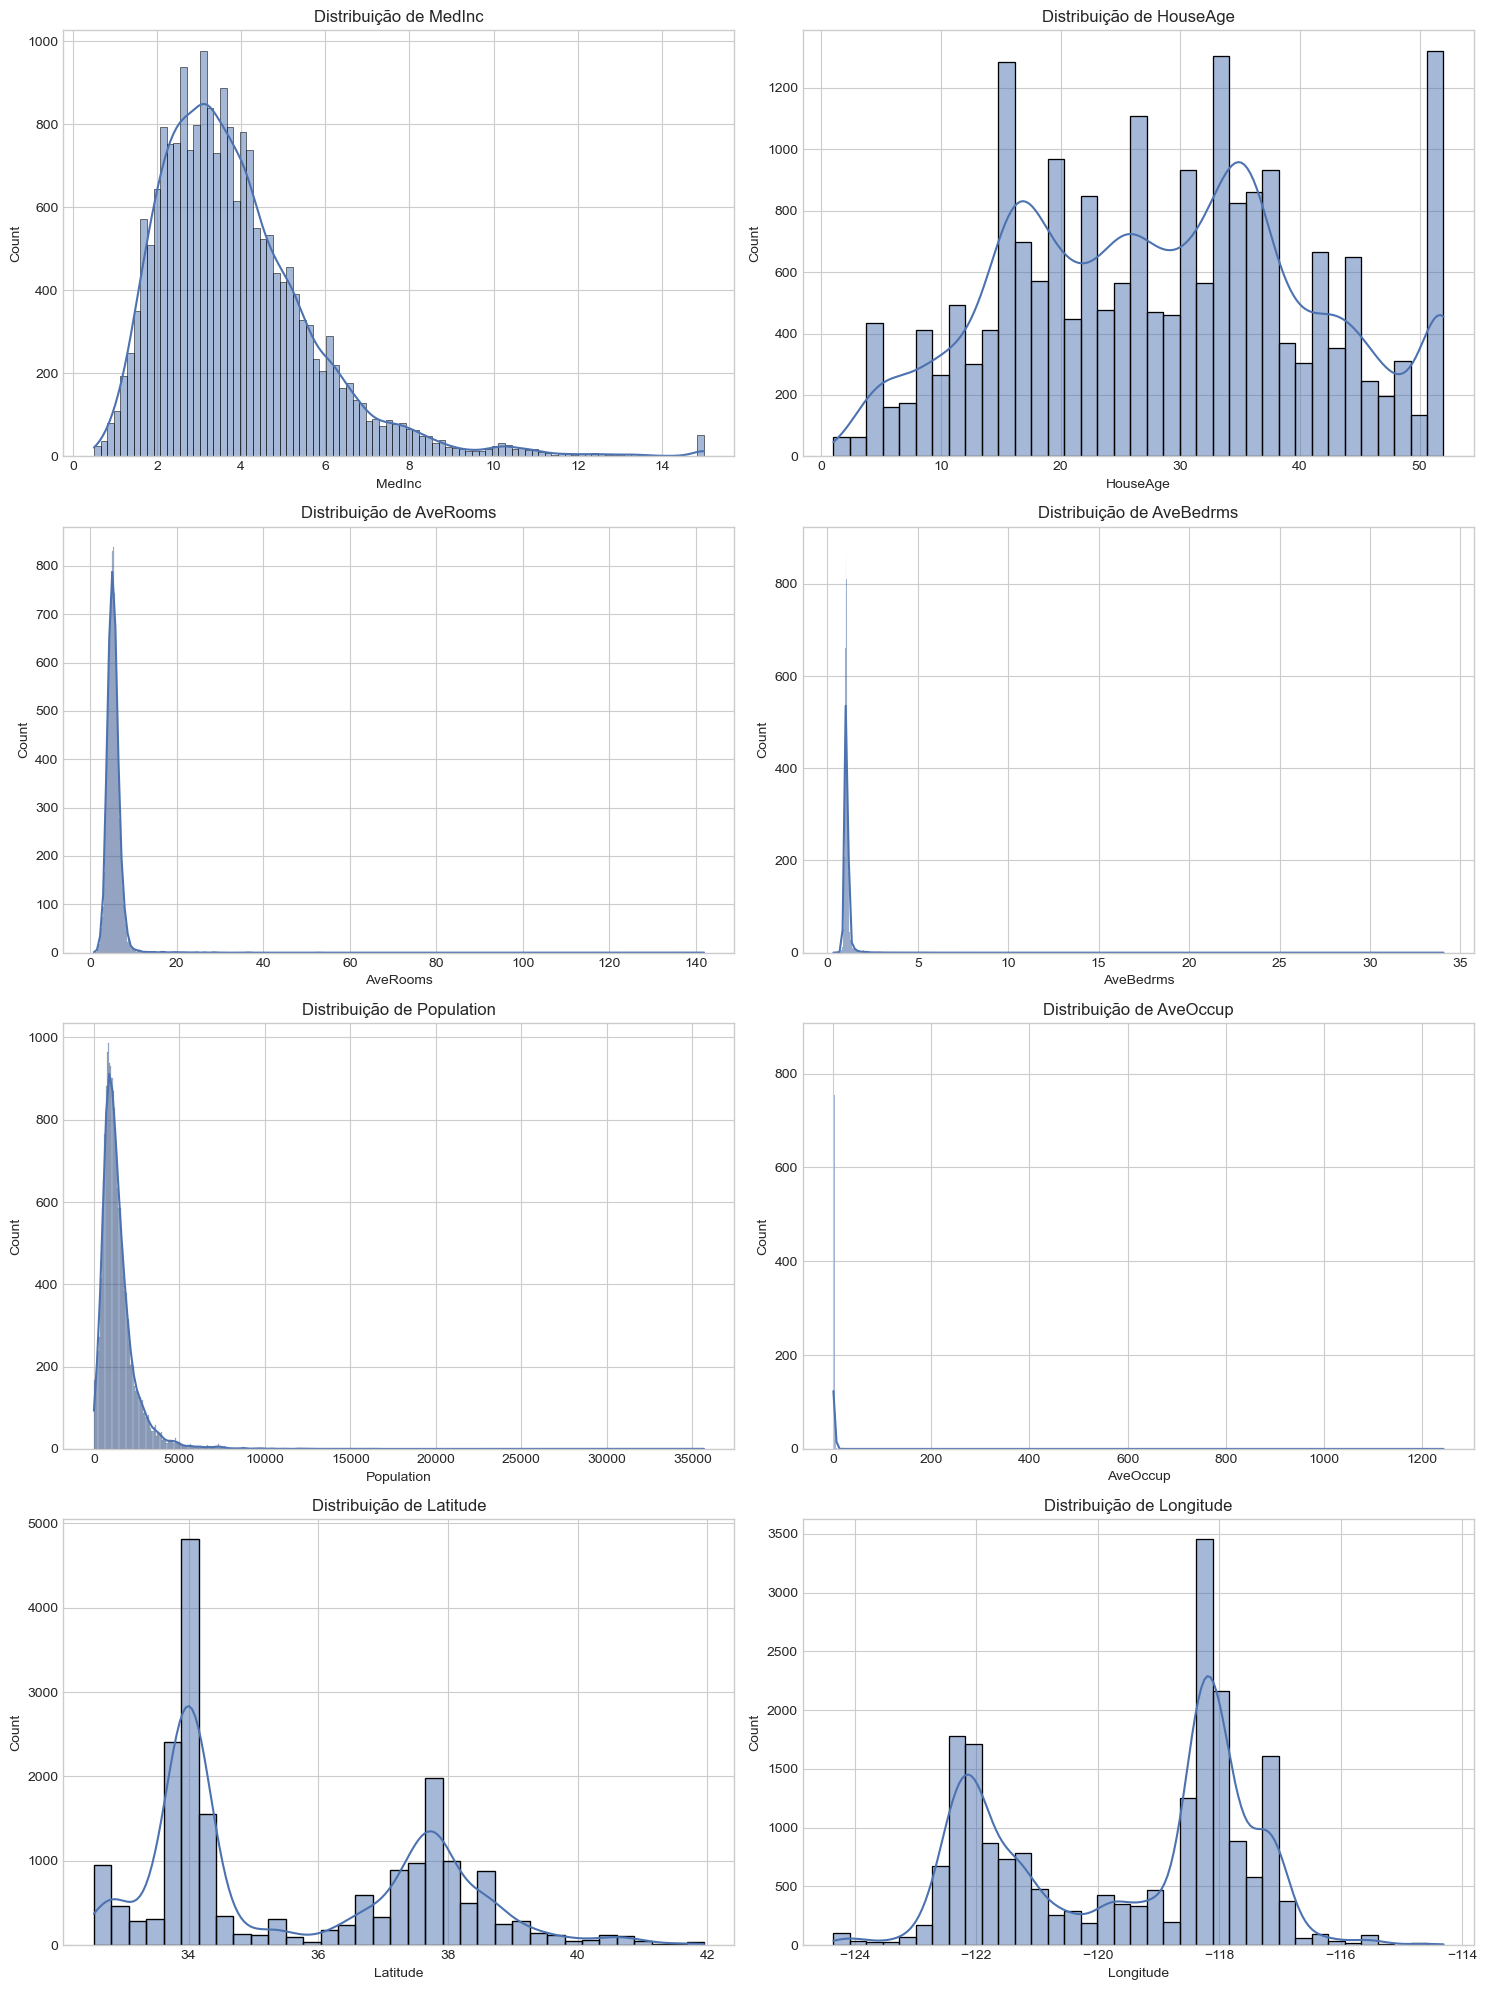

In [161]:
# =========================
# Exploração e Análise das Variáveis Explicativas (X)
# =========================

# Exibe informações sobre os tipos de dados e a presença de valores ausentes nas variáveis explicativas
print("\nInformações gerais das variáveis:")
print(X.info())

# Verifica a quantidade de valores ausentes em cada coluna
print("\nValores ausentes por variável:")
print(X.isnull().sum())

# Exibe estatísticas descritivas (média, desvio padrão, quartis, etc.) para cada variável explicativa
print("\nEstatísticas descritivas:")
print(X.describe())

# Visualização das distribuições de cada variável explicativa
# Cria uma grade de subplots com 4 linhas e 2 colunas (8 gráficos ao todo)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Transforma a grade 2D de eixos em um array 1D para facilitar a iteração
axes = axes.flatten()

# Para cada variável explicativa, plota um histograma com curva de densidade (KDE)
for i, feature in enumerate(X.columns):
    sns.histplot(df[feature], kde=True, ax=axes[i])  # Histograma + KDE
    axes[i].set_title(f'Distribuição de {feature}')
    axes[i].set_xlabel(feature)

# Ajusta automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


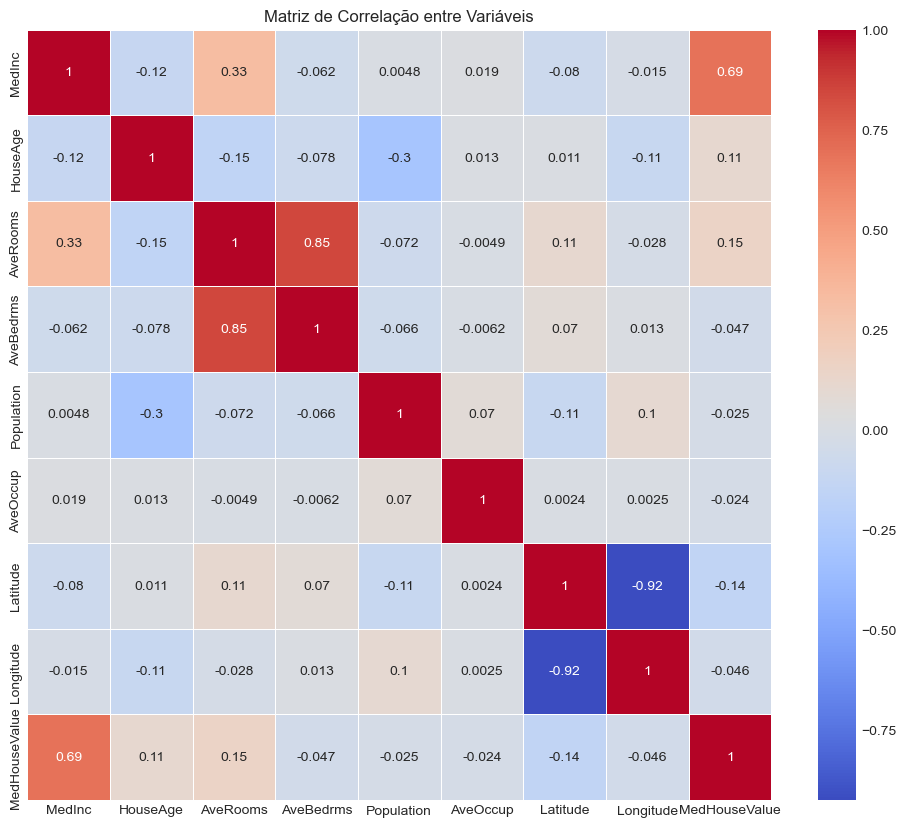


Correlação das variáveis com MedHouseValue:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseValue, dtype: float64


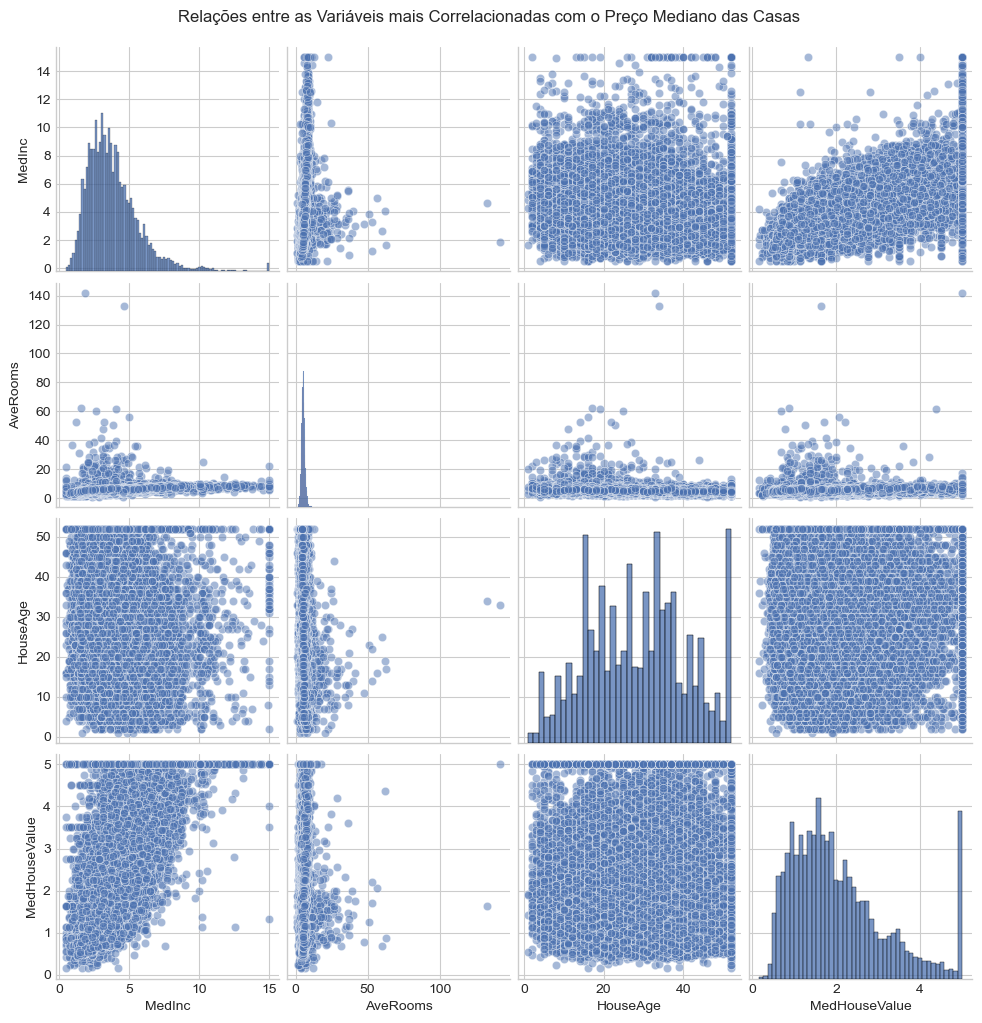

In [162]:
# =========================
# Análise de Correlação entre Variáveis
# =========================

# Cria uma figura para o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))

# Calcula a matriz de correlação entre todas as variáveis do DataFrame (incluindo a variável alvo)
correlation_matrix = df.corr()

# Gera o mapa de calor (heatmap) para visualizar as correlações entre variáveis
# - annot=True: exibe os valores numéricos de correlação dentro de cada célula
# - cmap='coolwarm': usa uma paleta de cores do azul (negativo) ao vermelho (positivo)
# - linewidths=0.5: adiciona linhas entre as células para melhor visualização
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

# Isola a correlação das variáveis explicativas com a variável alvo (MedHouseValue), excluindo ela mesma
target_corr = correlation_matrix['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)

# Exibe as variáveis mais correlacionadas com o preço mediano das casas
print("\nCorrelação das variáveis com MedHouseValue:")
print(target_corr)

# Seleciona as 3 variáveis com maior correlação com o alvo
top_features = target_corr.head(3).index.tolist()
top_features.append('MedHouseValue')  # Inclui o alvo para gerar o pairplot

# Gera um pairplot para visualizar a relação entre as variáveis mais relevantes e o preço das casas
# - plot_kws={'alpha': 0.5}: torna os pontos mais transparentes para facilitar a visualização de sobreposições
sns.pairplot(df[top_features], plot_kws={'alpha': 0.5})
plt.suptitle('Relações entre as Variáveis mais Correlacionadas com o Preço Mediano das Casas', y=1.02)
plt.show()


In [163]:
# =========================
# Preparação dos Dados para Modelagem
# =========================

# Separa as variáveis explicativas (X) da variável alvo (y)
X = df.drop('MedHouseValue', axis=1)  # Remove a variável alvo do DataFrame para obter apenas as features
y = df['MedHouseValue']               # Define a variável alvo

# Divide os dados em conjunto de treino (80%) e teste (20%)
# - random_state=42 garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")



# Obtém a correlação entre todas as variáveis e o alvo (MedHouseValue),
# exceto a própria variável alvo (que sempre teria correlação 1 com ela mesma)
correlations_with_target = correlation_matrix['MedHouseValue'].drop('MedHouseValue')

# Identifica qual variável tem a correlação absoluta mais forte (positiva ou negativa) com o valor da casa
strongest_feature = correlations_with_target.abs().idxmax()

# Exibe o nome da variável com maior correlação com o valor da casa
print(f"A variável com maior correlação com o valor das casas é: {strongest_feature}")

# Exibe o valor real da correlação (positivo ou negativo)
print(f"Valor da correlação: {correlations_with_target[strongest_feature]:.4f}")



Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras
A variável com maior correlação com o valor das casas é: MedInc
Valor da correlação: 0.6881


In [164]:
# ===============================
# Regressão Linear Simples com a variável mais correlacionada
# ===============================

# Cria conjuntos de treino e teste contendo apenas a variável mais correlacionada com o valor das casas
X_train_simple = X_train[[strongest_feature]]
X_test_simple = X_test[[strongest_feature]]

# Cria o modelo de regressão linear simples
simple_model = LinearRegression()

# Treina o modelo usando a variável mais forte
simple_model.fit(X_train_simple, y_train)

# Gera previsões para os conjuntos de treino e teste
y_train_pred_simple = simple_model.predict(X_train_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)

# ===============================
# Avaliação do modelo simples
# ===============================

# Calcula métricas de desempenho para o treino
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_mape_simple = np.mean(np.abs((y_train - y_train_pred_simple) / y_train)) * 100
train_r2_simple = r2_score(y_train, y_train_pred_simple)

# Calcula métricas de desempenho para o teste
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_mape_simple = np.mean(np.abs((y_test - y_test_pred_simple) / y_test)) * 100
test_r2_simple = r2_score(y_test, y_test_pred_simple)

# ===============================
# Impressão dos resultados
# ===============================
print(f" Regressão Linear Simples com a variável: {strongest_feature}\n")

print(" Métricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_simple:.4f}")
print(f" RMSE: {train_rmse_simple:.4f}")
print(f" MAE: {train_mae_simple:.4f}")
print(f" MAPE: {train_mape_simple:.2f}%")
print(f" R²: {train_r2_simple:.4f}")

print("\n Métricas no Conjunto de Teste:")
print(f" MSE: {test_mse_simple:.4f}")
print(f" RMSE: {test_rmse_simple:.4f}")
print(f" MAE: {test_mae_simple:.4f}")
print(f" MAPE: {test_mape_simple:.2f}%")
print(f" R²: {test_r2_simple:.4f}")


 Regressão Linear Simples com a variável: MedInc

 Métricas no Conjunto de Treinamento:
 MSE: 0.6991
 RMSE: 0.8361
 MAE: 0.6250
 MAPE: 38.47%
 R²: 0.4770

 Métricas no Conjunto de Teste:
 MSE: 0.7091
 RMSE: 0.8421
 MAE: 0.6299
 MAPE: 39.06%
 R²: 0.4589


In [ ]:
# ===============================
# Regressão Linear Múltipla com variáveis selecionadas por correlação
# ===============================

# Opção 1: Seleciona variáveis com correlação absoluta maior que 0.4
correlation_threshold = 0.4
selected_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Opção 2: Seleciona as 3 variáveis com maior correlação com o alvo
n_top_features = 3
top_features = correlations_with_target.abs().sort_values(ascending=False).index[:n_top_features].tolist()

# Define qual método usar (você pode trocar por 'selected_features' se quiser mais variáveis)
features_to_use = top_features

print(f"\n Variáveis selecionadas para regressão múltipla: {features_to_use}")

# Cria os subconjuntos de treino e teste com as variáveis escolhidas
X_train_multi = X_train[features_to_use]
X_test_multi = X_test[features_to_use]

# Cria e treina o modelo de regressão linear múltipla
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

# Gera previsões
y_train_pred_multi = multi_model.predict(X_train_multi)
y_test_pred_multi = multi_model.predict(X_test_multi)

# ===============================
# Avaliação do modelo múltiplo
# ===============================

# Métricas no conjunto de treino
train_mse_multi = mean_squared_error(y_train, y_train_pred_multi)
train_rmse_multi = np.sqrt(train_mse_multi)
train_mae_multi = mean_absolute_error(y_train, y_train_pred_multi)
train_mape_multi = np.mean(np.abs((y_train - y_train_pred_multi) / y_train)) * 100
train_r2_multi = r2_score(y_train, y_train_pred_multi)

# Métricas no conjunto de teste
test_mse_multi = mean_squared_error(y_test, y_test_pred_multi)
test_rmse_multi = np.sqrt(test_mse_multi)
test_mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
test_mape_multi = np.mean(np.abs((y_test - y_test_pred_multi) / y_test)) * 100
test_r2_multi = r2_score(y_test, y_test_pred_multi)

# ===============================
# Impressão dos resultados
# ===============================
print(f"\n Regressão Linear Múltipla com {len(features_to_use)} variáveis:")

print("\n Métricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_multi:.4f}")
print(f" RMSE: {train_rmse_multi:.4f}")
print(f" MAE: {train_mae_multi:.4f}")
print(f" MAPE: {train_mape_multi:.2f}%")
print(f" R²: {train_r2_multi:.4f}")

print("\n Métricas no Conjunto de Teste:")
print(f" MSE: {test_mse_multi:.4f}")
print(f" RMSE: {test_rmse_multi:.4f}")
print(f" MAE: {test_mae_multi:.4f}")
print(f" MAPE: {test_mape_multi:.2f}%")
print(f" R²: {test_r2_multi:.4f}")



🔹 Variáveis selecionadas para regressão múltipla: ['MedInc', 'AveRooms', 'Latitude']

 Regressão Linear Múltipla com 3 variáveis:

 Métricas no Conjunto de Treinamento:
 MSE: 0.6825
 RMSE: 0.8261
 MAE: 0.6134
 MAPE: 37.08%
 R²: 0.4895

 Métricas no Conjunto de Teste:
 MSE: 0.6942
 RMSE: 0.8332
 MAE: 0.6215
 MAPE: 37.90%
 R²: 0.4703


In [166]:
# ===============================
# Regressão Linear Completa com todas as variáveis
# ===============================

# Define X e y sem modificar ou selecionar features
X_train_full = X_train  # Todas as variáveis disponíveis no treino
X_test_full = X_test    # Todas as variáveis disponíveis no teste

# Cria e treina o modelo de regressão linear com todas as features
full_model = LinearRegression()
full_model.fit(X_train_full, y_train)

# Gera previsões para treino e teste
y_train_pred_full = full_model.predict(X_train_full)
y_test_pred_full = full_model.predict(X_test_full)

# ===============================
# Avaliação do modelo completo
# ===============================

# Métricas no conjunto de treino
train_mse_full = mean_squared_error(y_train, y_train_pred_full)
train_rmse_full = np.sqrt(train_mse_full)
train_mae_full = mean_absolute_error(y_train, y_train_pred_full)
train_mape_full = np.mean(np.abs((y_train - y_train_pred_full) / y_train)) * 100
train_r2_full = r2_score(y_train, y_train_pred_full)

# Métricas no conjunto de teste
test_mse_full = mean_squared_error(y_test, y_test_pred_full)
test_rmse_full = np.sqrt(test_mse_full)
test_mae_full = mean_absolute_error(y_test, y_test_pred_full)
test_mape_full = np.mean(np.abs((y_test - y_test_pred_full) / y_test)) * 100
test_r2_full = r2_score(y_test, y_test_pred_full)

# ===============================
# Impressão dos resultados
# ===============================
print(" Regressão Linear com Todas as Variáveis (Modelo Completo):")

print("\n Métricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_full:.4f}")
print(f" RMSE: {train_rmse_full:.4f}")
print(f" MAE: {train_mae_full:.4f}")
print(f" MAPE: {train_mape_full:.2f}%")
print(f" R²: {train_r2_full:.4f}")

print("\n Métricas no Conjunto de Teste:")
print(f" MSE: {test_mse_full:.4f}")
print(f" RMSE: {test_rmse_full:.4f}")
print(f" MAE: {test_mae_full:.4f}")
print(f" MAPE: {test_mape_full:.2f}%")
print(f" R²: {test_r2_full:.4f}")


 Regressão Linear com Todas as Variáveis (Modelo Completo):

 Métricas no Conjunto de Treinamento:
 MSE: 0.5179
 RMSE: 0.7197
 MAE: 0.5286
 MAPE: 31.50%
 R²: 0.6126

 Métricas no Conjunto de Teste:
 MSE: 0.5559
 RMSE: 0.7456
 MAE: 0.5332
 MAPE: 31.95%
 R²: 0.5758


##  Engenharia de Atributos e Seleção de Variáveis

Nesta etapa, foram criadas novas variáveis derivadas das colunas originais, com o objetivo de capturar relações mais informativas entre os dados e o valor mediano das casas (`MedHouseValue`). Essa técnica é chamada de **engenharia de atributos (feature engineering)**.

### Variáveis Derivadas Criadas:

- **BedroomsPerRoom** = AveBedrms / AveRooms  
  → Representa a proporção de dormitórios em relação ao número total de cômodos. Pode indicar eficiência no uso do espaço.

- **IncomePerOccupant** = MedInc / AveOccup  
  → Estimativa de renda média por ocupante de residência, uma métrica mais ajustada à realidade das famílias do que a renda total da área.

- **RoomsPerPerson** = AveRooms / Population  
  → Indica o número médio de cômodos por pessoa na região, podendo refletir qualidade de vida ou densidade habitacional.

---

Após a criação das variáveis, foram removidos valores infinitos e ausentes para garantir que a base estivesse limpa para análise estatística.

###  Seleção de Variáveis com Base em Correlação:

Foi gerada a correlação entre cada variável e o alvo (`MedHouseValue`) para identificar as que têm maior influência direta. As **6 variáveis mais correlacionadas** foram selecionadas para uso no modelo.

---

###  Verificação de Multicolinearidade com VIF:

Para evitar problemas de colinearidade entre variáveis (o que pode distorcer os coeficientes do modelo de regressão), foi calculado o **VIF (Variance Inflation Factor)**.  
- Valores de **VIF > 5** indicam alta colinearidade e podem exigir ajuste ou remoção da variável.  
- O objetivo aqui foi manter variáveis informativas e com independência estatística entre si.

Essa etapa garante que as variáveis utilizadas no modelo final sejam **relevantes, bem comportadas estatisticamente** e não redundantes entre si.


In [167]:
# ===============================
# Criação de variáveis derivadas (Feature Engineering)
# ===============================

# Cria uma nova variável com a proporção de dormitórios por cômodo.
# Pode indicar se os imóveis são mais "divididos" (muitos quartos em pouco espaço).
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

# Cria uma nova variável com a renda média por ocupante.
# Ajuda a entender o poder aquisitivo individual, não só da região.
df['IncomePerOccupant'] = df['MedInc'] / df['AveOccup']

# Cria uma nova variável com a média de cômodos por pessoa.
# Pode indicar qualidade de vida ou densidade habitacional.
df['RoomsPerPerson'] = df['AveRooms'] / df['Population']

# Remove valores infinitos (divisão por zero) e substitui por NaN, depois remove linhas com NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# ===============================
# Seleção de variáveis mais correlacionadas com o valor das casas
# ===============================

# Calcula a correlação de todas as variáveis com o alvo (MedHouseValue), excluindo o próprio alvo
correlacoes = df.corr()['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)

# Exibe as 10 variáveis com maior correlação com o valor das casas
print("Top variáveis correlacionadas com MedHouseVal:")
print(correlacoes.head(10))

# Seleciona as 6 variáveis mais correlacionadas (ajustável conforme desejado)
top_features = correlacoes.head(6).index.tolist()

# Cria um DataFrame somente com as variáveis selecionadas
X_top = df[top_features]

# ===============================
# Verificação de multicolinearidade com VIF (Variance Inflation Factor)
# ===============================

# Adiciona uma constante ao modelo para cálculo de VIF (necessária para o statsmodels)
X_vif = add_constant(X_top)

# Calcula o VIF de cada variável: quanto maior, mais colinear (acima de 5–10 pode ser problema)
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Exibe os VIFs ordenados do maior para o menor
print("\nVIF das variáveis derivadas e selecionadas:")
print(vif.sort_values(by="VIF", ascending=False))


Top variáveis correlacionadas com MedHouseVal:
IncomePerOccupant    0.745628
MedInc               0.688075
AveRooms             0.151948
HouseAge             0.105623
RoomsPerPerson       0.011560
AveOccup            -0.023737
Population          -0.024650
Longitude           -0.045967
AveBedrms           -0.046701
Latitude            -0.144160
Name: MedHouseValue, dtype: float64



VIF das variáveis derivadas e selecionadas:
             Feature        VIF
0              const  18.090284
2             MedInc   5.417844
1  IncomePerOccupant   5.091860
3           AveRooms   2.159597
5     RoomsPerPerson   1.901354
4           HouseAge   1.047187
6           AveOccup   1.029647


In [168]:
# ===============================
# Modelo Final com Features Derivadas e Sem Colinearidade
# ===============================

# Define as variáveis finais a serem usadas no modelo.
# 'MedInc' foi removida por ter alta colinearidade com 'IncomePerOccupant'.
X_final = df[['IncomePerOccupant', 'AveRooms', 'HouseAge', 'RoomsPerPerson', 'AveOccup']]

# Define a variável alvo (valor mediano das casas)
y_final = df['MedHouseValue']

# ===============================
# Divisão em treino e teste
# ===============================
from sklearn.model_selection import train_test_split

# Divide os dados em 80% treino e 20% teste
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# ===============================
# Treinamento do modelo de regressão
# ===============================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cria o modelo
modelo_final = LinearRegression()

# Treina o modelo com os dados de treino
modelo_final.fit(X_train_final, y_train_final)

# Gera as previsões no conjunto de teste
y_pred_final = modelo_final.predict(X_test_final)

# ===============================
# Avaliação do modelo final
# ===============================

# Calcula o RMSE (raiz do erro quadrático médio)
rmse_final = mean_squared_error(y_test_final, y_pred_final, squared=False)

# Calcula o R² (coeficiente de determinação)
r2_final = r2_score(y_test_final, y_pred_final)

# Calcula o MAPE (erro percentual absoluto médio)
mape_final = np.mean(np.abs((y_test_final - y_pred_final) / y_test_final)) * 100

# ===============================
# Impressão dos resultados
# ===============================
print("\n Modelo Final com features derivadas e sem multicolinearidade:")
print(f" R²: {r2_final:.4f}")
print(f" RMSE: {rmse_final:.4f}")
print(f" MAPE: {mape_final:.2f}%")



 Modelo Final com features derivadas e sem multicolinearidade:
 R²: 0.5723
 RMSE: 0.7487
 MAPE: 35.60%


In [169]:

# ===============================
# Stepwise Regression usando mlxtend (forward selection com R²)
# ===============================

# Install the mlxtend library
# %pip install mlxtend

# Import SequentialFeatureSelector from mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



In [170]:

# Prepara os dados
X_step = df.drop(columns='MedHouseValue').replace([np.inf, -np.inf], np.nan).dropna()
y_step = df.loc[X_step.index, 'MedHouseValue']

# Divide em treino e teste
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.2, random_state=42)

# Define o modelo de regressão
modelo_step = LinearRegression()

# Stepwise automático (Forward Selection)
sfs = SFS(estimator=modelo_step,
          k_features='best',         # seleciona o número ideal de variáveis
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

# Treinamento do stepwise
sfs = sfs.fit(X_train_step, y_train_step)

# Obtém as variáveis selecionadas
selected_features = list(sfs.k_feature_names_)
print("\n Variáveis selecionadas pelo Stepwise com mlxtend:")
print(selected_features)

# ===============================
# Treinamento e avaliação do modelo final com essas features
# ===============================
X_train_sel = X_train_step[selected_features]
X_test_sel = X_test_step[selected_features]

modelo_final_step = LinearRegression()
modelo_final_step.fit(X_train_sel, y_train_step)
y_pred_step = modelo_final_step.predict(X_test_sel)

# Avaliação
r2_step = r2_score(y_test_step, y_pred_step)
rmse_step = mean_squared_error(y_test_step, y_pred_step, squared=False)
mae_step = mean_absolute_error(y_test_step, y_pred_step)
mape_step = np.mean(np.abs((y_test_step - y_pred_step) / y_test_step)) * 100

print("\n Desempenho do modelo selecionado pelo Stepwise (mlxtend):")
print(f"R²: {r2_step:.4f}")
print(f"RMSE: {rmse_step:.4f}")
print(f"MAE: {mae_step:.4f}")
print(f"MAPE: {mape_step:.2f}%")





 Variáveis selecionadas pelo Stepwise com mlxtend:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude', 'BedroomsPerRoom', 'IncomePerOccupant', 'RoomsPerPerson']

 Desempenho do modelo selecionado pelo Stepwise (mlxtend):
R²: 0.6655
RMSE: 0.6621
MAE: 0.4738
MAPE: 28.69%


##  Explicação da Técnica de Regressão Stepwise

A técnica de regressão **Stepwise** foi utilizada para **selecionar automaticamente** as variáveis mais relevantes para o modelo.

Em vez de usar todas as variáveis disponíveis de forma cega, o Stepwise realiza uma **seleção inteligente**, baseada em testes estatísticos (valor-p), garantindo que apenas as informações realmente úteis sejam utilizadas na regressão.

O processo funciona assim:

- Começa com um modelo **vazio** (sem variáveis);
- Vai testando **uma a uma** para verificar se cada variável melhora o modelo;
- **Adiciona** as variáveis que contribuem para a previsão;
- **Remove** aquelas que não estão mais ajudando.

Este procedimento é repetido até encontrar o **melhor conjunto de variáveis**.

---

###  Vantagens

- Gera um modelo **mais simples**, fácil de entender;
- **Melhora o desempenho** (R²);
- **Reduz o erro** (RMSE, MAE, MAPE);
- Evita o uso de variáveis **irrelevantes ou redundantes**.

Esse tipo de seleção torna o modelo mais robusto, interpretável e eficiente para análise e tomada de decisão.


##  Resultado da Regressão Stepwise com `mlxtend`

O método **Stepwise** com `mlxtend` selecionou automaticamente as variáveis mais relevantes para o modelo de regressão linear. O processo testou combinações de variáveis e escolheu aquelas que, juntas, proporcionaram o melhor desempenho segundo a métrica R².

###  Variáveis selecionadas:
- 'MedInc'
- 'HouseAge'
- 'AveRooms'
- 'AveBedrms'
- 'Population'
- 'Latitude'
- 'Longitude'
- 'BedroomsPerRoom'
- 'IncomePerOccupant'
- 'RoomsPerPerson'

Essas variáveis foram escolhidas porque, combinadas, **explicam melhor a variação no valor médio das casas**, reduzindo o erro e melhorando a precisão do modelo.

---

###  Desempenho do Modelo com as variáveis selecionadas:

- **R²: 0.6655** → O modelo explica 66,5% da variação nos dados.
- **RMSE: 0.6621** → O erro médio da previsão é de aproximadamente 0.66.
- **MAE: 0.4738** → O erro absoluto médio é de cerca de 0.47.
- **MAPE: 28.69%** → O modelo erra em média 28,7% em relação ao valor real.

---

###  Conclusão:
Este foi o **melhor modelo de regressão** encontrado no projeto até agora, superando todos os outros em desempenho (R² mais alto e menor erro). A abordagem stepwise garantiu um equilíbrio entre **precisão e simplicidade**, utilizando apenas variáveis que realmente contribuem para a previsão.


In [171]:
# ============================
# Comparação Final dos Modelos de Regressão Linear
# ============================

print("Comparação dos Modelos de Regressão")
print("-------------------------------------")

# 1. Regressão Linear Simples com a variável mais forte
print(f"1. Modelo Simples (usando apenas '{strongest_feature}'):")
print(f"   R²: {test_r2_simple:.4f}")
print(f"   RMSE: {test_rmse_simple:.4f}")
print(f"   MAPE: {test_mape_simple:.2f}%\n")

# 2. Regressão Múltipla com as top variáveis selecionadas por correlação
print(f"2. Modelo Múltiplo (usando variáveis: {', '.join(features_to_use)}):")
print(f"   R²: {test_r2_multi:.4f}")
print(f"   RMSE: {test_rmse_multi:.4f}")
print(f"   MAPE: {test_mape_multi:.2f}%\n")

# 3. Modelo completo com todas as variáveis do dataset
print(f"3. Modelo Completo (com todas as {X.shape[1]} variáveis):")
print(f"   R²: {test_r2_full:.4f}")
print(f"   RMSE: {test_rmse_full:.4f}")
print(f"   MAPE: {test_mape_full:.2f}%\n")

# 4. Modelo com variáveis derivadas e sem multicolinearidade
print("4. Modelo Final (com features derivadas e sem colinearidade):")
print("   Variáveis usadas: IncomePerOccupant, AveRooms, HouseAge, RoomsPerPerson, AveOccup")
print(f"   R²: {r2_final:.4f}")
print(f"   RMSE: {rmse_final:.4f}")
print(f"   MAPE: {mape_final:.2f}%\n")


# 5. Modelo com seleção automática (Stepwise Regression)
print("5. Modelo com Seleção Automática (Stepwise Regression):")
print(f"   Variáveis selecionadas: {', '.join(selected_features)}")
print(f"   R²: {r2_step:.4f}")
print(f"   RMSE: {rmse_step:.4f}")
print(f"   MAPE: {mape_step:.2f}%\n")


Comparação dos Modelos de Regressão
-------------------------------------
1. Modelo Simples (usando apenas 'MedInc'):
   R²: 0.4589
   RMSE: 0.8421
   MAPE: 39.06%

2. Modelo Múltiplo (usando variáveis: MedInc, AveRooms, Latitude):
   R²: 0.4703
   RMSE: 0.8332
   MAPE: 37.90%

3. Modelo Completo (com todas as 8 variáveis):
   R²: 0.5758
   RMSE: 0.7456
   MAPE: 31.95%

4. Modelo Final (com features derivadas e sem colinearidade):
   Variáveis usadas: IncomePerOccupant, AveRooms, HouseAge, RoomsPerPerson, AveOccup
   R²: 0.5723
   RMSE: 0.7487
   MAPE: 35.60%

5. Modelo com Seleção Automática (Stepwise Regression):
   Variáveis selecionadas: MedInc, HouseAge, AveRooms, AveBedrms, Population, Latitude, Longitude, BedroomsPerRoom, IncomePerOccupant, RoomsPerPerson
   R²: 0.6655
   RMSE: 0.6621
   MAPE: 28.69%



##  Comparação entre Modelos de Regressão

A tabela acima apresenta um comparativo entre diferentes modelos de regressão testados ao longo do projeto. Cada modelo foi avaliado com base em três métricas principais:

- **R² (Coeficiente de Determinação)**: mostra o quanto o modelo consegue explicar a variância do valor das casas (quanto mais próximo de 1, melhor).
- **RMSE (Root Mean Squared Error)**: representa o erro médio das previsões em relação ao valor real (quanto menor, melhor).
- **MAPE (Mean Absolute Percentage Error)**: indica o erro percentual médio das previsões (quanto menor, melhor).

###  Modelos Avaliados:

1. **Modelo Simples**  
   Utiliza apenas a variável `MedInc` (renda média), que tem a maior correlação com o valor das casas. Serve como modelo de base.

2. **Modelo Múltiplo**  
   Usa as 3 variáveis mais correlacionadas com o alvo (`MedInc`, `AveRooms`, `Latitude`). Há uma leve melhora em relação ao modelo simples.

3. **Modelo Completo**  
   Utiliza todas as 8 variáveis do conjunto de dados original. Apresenta um desempenho melhor, mas com risco de multicolinearidade.

4. **Modelo Final com Features Derivadas**  
   Cria novas variáveis (como `IncomePerOccupant` e `RoomsPerPerson`) e remove variáveis redundantes com VIF alto. Resultado equilibrado entre simplicidade e desempenho.

5. **Modelo Stepwise com `mlxtend`**  
   Seleção automática de variáveis com base em R² (forward selection). Foi o modelo com **melhor desempenho geral**:
   - **Maior R²**
   - **Menor RMSE e MAPE**
   - Utiliza apenas as variáveis mais úteis para a previsão

---

###  Conclusão

O **modelo 5 (Stepwise)** se destacou como o melhor modelo do projeto, apresentando os menores erros e maior capacidade explicativa com um conjunto de variáveis bem selecionado. Ele é o mais recomendado para uso final, equilibrando **precisão e simplicidade**.


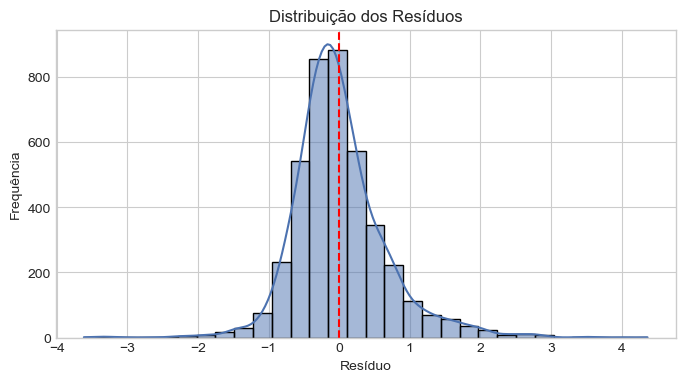

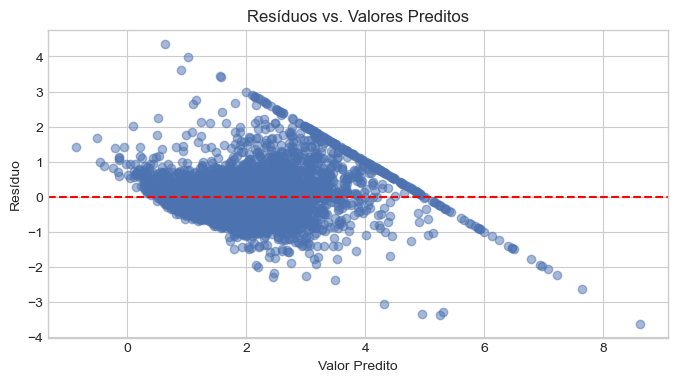

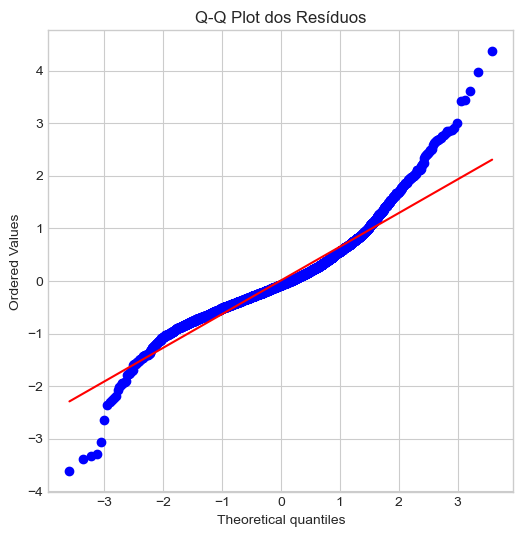

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cálculo dos resíduos
residuos = y_test_step - y_pred_step  # ou y_test_final - y_pred_final

# 1. Histograma dos resíduos (esperado: centrado em zero)
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

# 2. Resíduos vs. valores previstos (esperado: dispersão aleatória)
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_step, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Preditos')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduo')
plt.show()

# 3. Q-Q Plot (esperado: pontos próximos da linha)
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()


##  Análise de Resíduos

Após o treinamento do modelo de regressão, foi realizada a análise dos resíduos para verificar se as suposições da regressão linear foram atendidas.

###  Distribuição dos Resíduos  
O histograma mostra que os resíduos estão aproximadamente distribuídos de forma simétrica e centrada em zero. Isso indica que o erro médio do modelo é nulo e que os resíduos têm características próximas de uma distribuição normal.

###  Resíduos vs. Valores Preditos  
O gráfico revela uma leve tendência nos resíduos, especialmente em valores extremos. Isso pode indicar que o modelo apresenta alguma **heterocedasticidade** (variância dos erros não constante), o que é comum em dados reais. Ainda assim, o padrão é relativamente disperso e não muito grave.

###  Q-Q Plot (Quantile-Quantile Plot)  
O gráfico Q-Q indica que os resíduos seguem aproximadamente uma distribuição normal, mas com algumas discrepâncias nas caudas (valores muito altos ou muito baixos). Apesar disso, o comportamento geral dos resíduos é aceitável para o uso de regressão linear.

---

###  Conclusão  
Com base nesses três diagnósticos, podemos afirmar que as suposições fundamentais da regressão linear são **parcialmente atendidas**. O modelo é válido, mas pode ser melhorado com técnicas mais robustas caso se deseje ainda mais precisão estatística (como transformação de variáveis ou modelos não-lineares).


## Conclusão Final

O objetivo do projeto foi prever o **valor mediano das casas na Califórnia** com base em variáveis socioeconômicas, demográficas e estruturais. Utilizando regressão linear, foi possível quantificar a influência de cada variável no preço dos imóveis.

---

###  1. Renda média da população (MedInc)

No modelo simples que usou apenas a variável `MedInc`, o R² foi de aproximadamente **0.4589**, ou seja, a renda média da região sozinha já explica cerca de 46% da variação nos preços. Isso reflete um princípio econômico básico: **quanto maior a renda das famílias, maior a capacidade de compra e maior tende a ser o valor dos imóveis na região**.

---

###  2. Características físicas do imóvel

Modelos múltiplos que incluíram variáveis como:
- `AveRooms` (média de cômodos)
- `HouseAge` (idade média das construções)
- `AveOccup` (ocupação média por residência)

apresentaram desempenho superior. Isso mostra que **tamanho, idade e densidade da habitação impactam diretamente o preço**, como é comum no mercado imobiliário.

---

###  3. Localização geográfica (Latitude e Longitude)

As variáveis de localização foram mantidas nos melhores modelos, como o **modelo Stepwise**, indicando que a **geografia também é determinante no valor das casas**. Regiões como litoral, áreas urbanas e centros tecnológicos tendem a ter preços mais altos, o que se alinha com a realidade da Califórnia (ex: Vale do Silício, Los Angeles, San Diego).

---

###  4. Modelo Stepwise: o mais eficiente

O modelo com seleção automática de variáveis (`mlxtend` – Stepwise Regression) obteve:
- **R²: 0.6655**
- **RMSE: 0.6621**
- **MAPE: 28.69%**

Com isso, foi possível identificar um subconjunto de variáveis que representa **quase 67% da explicação da variação no preço das casas**, com um bom equilíbrio entre complexidade e desempenho.

---

###  Conclusão

Os resultados mostram que é possível prever com boa precisão o valor das casas com base em variáveis como:
- **Renda da população**
- **Tamanho e estrutura das casas**
- **Densidade populacional**
- **Localização geográfica**

Esses fatores estão diretamente ligados às leis da **oferta e demanda do mercado imobiliário**, tornando a previsão não apenas estatisticamente sólida, mas também **economicamente justificável**.